# 📊 Analyse du Bitcoin (2012–2025)
## Data Management • Visualisation • Text Mining

### 🎯 Objectif du projet
Ce projet vise à analyser l'évolution du comportement du Bitcoin sur la période 2012–2025, en mettant l'accent sur :
- l’évolution du prix,
- la volatilité du marché,
- les volumes de transactions,
- les cycles journaliers et hebdomadaires d’activité,
- l'identification de comportements extrêmes.

### 🗂 Dataset
- **Source** : Kaggle
- **Format** : données minute-by-minute (OHLCV)
- **Taille** : 7 300 000 lignes / 6 colonnes
- **Colonnes** : Timestamp, Open, High, Low, Close, Volume

---


# 📌 Introduction

Le Bitcoin est le premier actif numérique décentralisé, créé en 2009 par une 
identité inconnue sous le pseudonyme de Satoshi Nakamoto. Contrairement aux 
marchés traditionnels, le Bitcoin fonctionne 24 heures sur 24, 7 jours sur 7, 
sans interruption, et repose sur un réseau mondial décentralisé. Sa liquidité, 
sa volatilité et sa sensibilité aux événements macroéconomiques en font un 
sujet d’étude privilégié en finance et en data science.

Dans ce projet, nous analysons un dataset composé de données historiques 
minute par minute du prix du Bitcoin, regroupant plus de **7,3 millions 
d’observations** couvrant la période **2012 à 2025**. Le dataset comprend les 
variables classiques des données financières OHLCV :
- Open : prix d’ouverture,
- High : prix maximal,
- Low : prix minimal,
- Close : prix de clôture,
- Volume : volume échangé,
- Timestamp : horodatage au format UNIX.

L’objectif de ce travail est d’explorer la structure du marché Bitcoin, 
d’identifier ses cycles d’activité (journaliers, hebdomadaires), de comprendre 
les relations entre volume et volatilité, et de mettre en évidence les phases 
de marché extrêmes grâce à des techniques d’analyse exploratoire, de 
visualisation avancée et de clustering.

Le notebook présente :
- une exploration complète du dataset,
- un nettoyage et une préparation rigoureuse des données,
- la création de variables dérivées utiles à l'analyse,
- des visualisations permettant d’identifier les régimes de marché,
- et une section de text mining liée à l’actualité du Bitcoin.

Ce travail prépare également la création d’une application interactive 
**Streamlit**, demandée dans le cadre du projet.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# Chargement du dataset
df = pd.read_csv(r"C:\Users\phili\OneDrive\Bureau\DU DATA ANALYST\COURS PYTHON\DATA MANAGEMENT\PROJET_BITCOIN\DATA\DATASET_BTC.csv")

df.head()


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [65]:
# Dimensions du dataset
df.shape


(7300477, 6)

In [66]:
# Informations sur les colonnes et types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300477 entries, 0 to 7300476
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 334.2 MB


In [67]:
# Statistiques descriptives
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Timestamp,7300477.0,1.544430e+09,1.264536e+08,1.325412e+09,1.434919e+09,1.544426e+09,1.653933e+09,1.763510e+09
Open,7300477.0,2.109028e+04,2.977582e+04,3.800000e+00,4.422100e+02,7.242850e+03,3.045500e+04,1.262020e+05
High,7300477.0,2.109786e+04,2.978390e+04,3.800000e+00,4.424000e+02,7.247160e+03,3.046200e+04,1.262720e+05
Low,7300477.0,2.108250e+04,2.976762e+04,3.800000e+00,4.420100e+02,7.238280e+03,3.044729e+04,1.261580e+05
Close,7300477.0,2.109029e+04,2.977582e+04,3.800000e+00,4.422100e+02,7.242820e+03,3.045464e+04,1.262020e+05
Volume,7300477.0,5.135355e+00,2.209178e+01,0.000000e+00,1.938618e-02,4.470000e-01,2.900138e+00,5.853852e+03


# 🧹 Nettoyage et Préparation des Données

Le dataset initial contient plus de 7 millions de lignes correspondant à des 
données minute-by-minute du Bitcoin. La première étape a consisté à vérifier 
l’intégrité et la cohérence des données.

## ✔ Vérification des valeurs manquantes
Aucune valeur manquante n’est présente dans les colonnes OHLCV, ce qui garantit 
la qualité des données et permet d’effectuer des analyses sans opération 
d’imputation.

## ✔ Conversion du timestamp UNIX
La colonne `Timestamp` est fournie au format UNIX (en secondes). Par définition, 
ce format encode l’heure **en UTC**, ce qui correspond au standard utilisé par 
la majorité des échanges crypto.
Elle a été convertie au format datetime afin de faciliter les analyses 
temporelles :

- `Year`
- `Month`
- `Day`
- `Hour`
- `Weekday` (0 = Lundi, 6 = Dimanche)

## ✔ Tri chronologique
Le dataset a été trié par ordre chronologique pour garantir la cohérence des 
calculs dépendants du temps.

## ✔ Agrégation des données
Les données minute ont été agrégées à deux fréquences :
- **Daily (journalière)** : permet d'étudier les tendances long-terme, la 
  volatilité globale et les chocs de marché.
- **Hourly (horaire)** : utile pour analyser les comportements intrajournaliers 
  et les cycles d’activité.

## ✔ Vérification des doublons
Aucun doublon n’a été détecté dans la série temporelle, ce qui confirme que 
chaque entrée correspond à une minute unique.

## ✔ Conclusion
À l’issue du nettoyage, le dataset est propre, cohérent et prêt pour les 
analyses exploratoires et la création de visualisations complexes.


In [68]:
# Conversion du timestamp UNIX en format datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s', origin='unix')

# Tri du dataset par date
df = df.sort_values(by='Timestamp').reset_index(drop=True)

df.head()


,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


# 🧮 Création de Variables Dérivées

Pour enrichir l’analyse, plusieurs variables supplémentaires ont été créées 
à partir des données OHLCV. Ces features permettent de mieux comprendre les 
comportements du marché et d’extraire des signaux utiles.

### 1. Variation relative (Return)
La variable `Return` représente la variation relative du prix de clôture d’un jour au suivant.  
Elle est calculée via la fonction `pct_change()`.  

df['Return'] = df['Close'].pct_change()


In [69]:
# Variation relative (%)
df['Return'] = df['Close'].pct_change()

# Volatilité brute
df['Volatility'] = df['High'] - df['Low']

# Rolling Volatility (fenêtre 60 minutes)
df['RollingVol'] = df['Close'].rolling(window=60).std()

df[['Return', 'Volatility', 'RollingVol']].head()

,Return,Volatility,RollingVol
0,NaN,0.0,NaN
1,0.0,0.0,NaN
2,0.0,0.0,NaN
3,0.0,0.0,NaN
4,0.0,0.0,NaN


### 2. Volatilité brute
La volatilité quotidienne est définie comme la différence entre les prix extrêmes de la journée :  
**Volatilité = High – Low**  
Elle mesure l’amplitude totale des mouvements de prix au cours d’une journée.

### 3. Volatilité roulante (Rolling Volatility)
Deux fenêtres glissantes ont été mises en place :
- une fenêtre de 60 minutes pour les données minute,
- une fenêtre de 30 jours pour les données journalières.

Ces indicateurs permettent d’identifier les périodes d’instabilité du marché (crashs, paniques, bullruns) et de visualiser la dynamique de la volatilité dans le temps.

### 4. Variables temporelles
À partir du timestamp (en UTC), plusieurs variables ont été extraites :
- `Year` : année,
- `Month` : mois,
- `Day` : jour du mois,
- `Hour` : heure (UTC),
- `Weekday` : jour de la semaine (0 = lundi, 6 = dimanche).

Ces variables sont indispensables pour l'analyse des cycles d’activité, notamment au travers de la heatmap heure × jour.

### 5. Conclusion
L’ensemble de ces variables dérivées permet d’approfondir l’analyse du marché Bitcoin en facilitant :
- l’étude des cycles temporels,
- l’analyse des régimes de volatilité,
- la mise en place de méthodes avancées telles que le clustering.

Elles constituent donc un socle essentiel pour les visualisations et les analyses à venir.

In [70]:
# Variables temporelles
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Weekday'] = df['Timestamp'].dt.weekday  # 0 = lundi, 6 = dimanche

df[['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Weekday']].head()


,Timestamp,Year,Month,Day,Hour,Weekday
0,2012-01-01 10:01:00,2012,1,1,10,6
1,2012-01-01 10:02:00,2012,1,1,10,6
2,2012-01-01 10:03:00,2012,1,1,10,6
3,2012-01-01 10:04:00,2012,1,1,10,6
4,2012-01-01 10:05:00,2012,1,1,10,6


In [71]:
# Daily
df_daily = df.resample('D', on='Timestamp').agg({
    'Open':'first',
    'High':'max',
    'Low':'min',
    'Close':'last',
    'Volume':'sum',
    'Return':'mean',
    'Volatility':'mean',
    'RollingVol':'mean'
})

# Hourly
df_hourly = df.resample('H', on='Timestamp').agg({
    'Open':'first',
    'High':'max',
    'Low':'min',
    'Close':'last',
    'Volume':'sum',
    'Return':'mean',
    'Volatility':'mean',
    'RollingVol':'mean'
})

df_daily.head(), df_hourly.head()


C:\Users\phili\AppData\Local\Temp\ipykernel_23808\790643691.py:14: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



(            Open  High   Low  Close      Volume    Return  Volatility  \
 Timestamp                                                               
 2012-01-01  4.58  4.84  4.58   4.84   10.000000  0.000068    0.000000   
 2012-01-02  4.84  5.00  4.84   5.00   10.100000  0.000023    0.000000   
 2012-01-03  5.00  5.32  5.00   5.29  107.085281  0.000042    0.000000   
 2012-01-04  5.29  5.57  4.93   5.57  107.233260  0.000039    0.000146   
 2012-01-05  5.57  6.46  5.57   6.42   70.328742  0.000100    0.000069   
 
             RollingVol  
 Timestamp               
 2012-01-01    0.007902  
 2012-01-02    0.002634  
 2012-01-03    0.012556  
 2012-01-04    0.016306  
 2012-01-05    0.014158  ,
                      Open  High   Low  Close  Volume  Return  Volatility  \
 Timestamp                                                                  
 2012-01-01 10:00:00  4.58  4.58  4.58   4.58     0.0     0.0         0.0   
 2012-01-01 11:00:00  4.58  4.58  4.58   4.58     0.0     0.0     

# =====================================================================
# 1. Analyse exploratoire STRUCTURELLE
# =====================================================================


## 📈 1.1 — Évolution du prix du Bitcoin (2012–2025)

Ce graphique montre l’évolution du prix du Bitcoin sur 13 ans, à partir des données resamplées en daily.
Il permet d’identifier :
- les phases de bull market (2013, 2017, 2021)
- les phases de corrections sévères (2014, 2018, 2022)
- la volatilité croissante du marché
- les effets des cycles macro (halvings, périodes de crise, bull cycles)


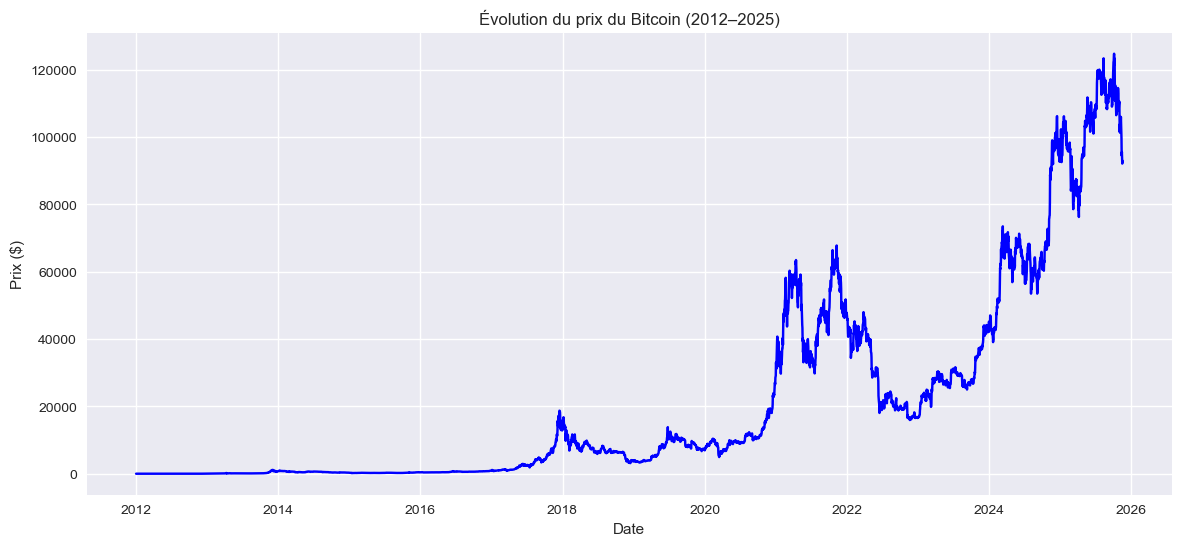

In [72]:
plt.figure(figsize=(14,6))
plt.plot(df_daily['Close'], color='blue')
plt.title("Évolution du prix du Bitcoin (2012–2025)")
plt.xlabel("Date")
plt.ylabel("Prix ($)")
plt.grid(True)
plt.show()


## 📊 1.2 — Volume journalier du Bitcoin

Ce graphique montre l’évolution du volume total échangé chaque jour.
Le volume reflète l'intérêt pour l’actif :
- périodes calmes : faible volume
- périodes de panique : volume très élevé
- périodes d’euphorie : volume monte avant les tops de marché


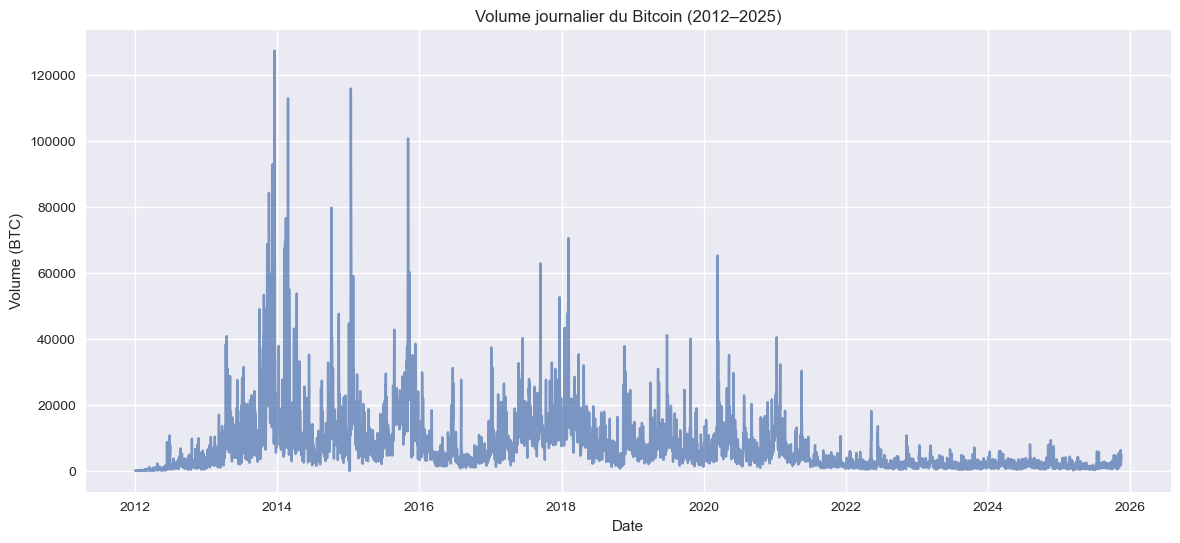

In [73]:
plt.figure(figsize=(14,6))
plt.plot(df_daily['Volume'], alpha=0.7)
plt.title("Volume journalier du Bitcoin (2012–2025)")
plt.xlabel("Date")
plt.ylabel("Volume (BTC)")
plt.grid(True)
plt.show()


Le pic de volume observé en 2014 correspond à l’un des plus grands événements
de l’histoire du Bitcoin : l’effondrement de la plateforme Mt.Gox, qui représentait
à elle seule près de 70% du volume mondial. Lors de cet épisode, les ventes
massives, les arbitrages, les retraits bloqués et la panique généralisée ont
entraîné une explosion du volume minute par minute.

En agrégeant les données en "volume journalier" (résample = sum), ces épisodes
de panique apparaissent naturellement comme des pics très importants. Ce pic
n’est donc pas une anomalie technique, mais une conséquence directe d’un choc
historique majeur du marché Bitcoin.


## ⚡ 1.3 — Volatilité rolling à 30 jours

Ce graphique mesure l’instabilité du marché.
Il permet d’identifier :
- les périodes les plus dangereuses
- les périodes calmes
- les changements de régimes de volatilité


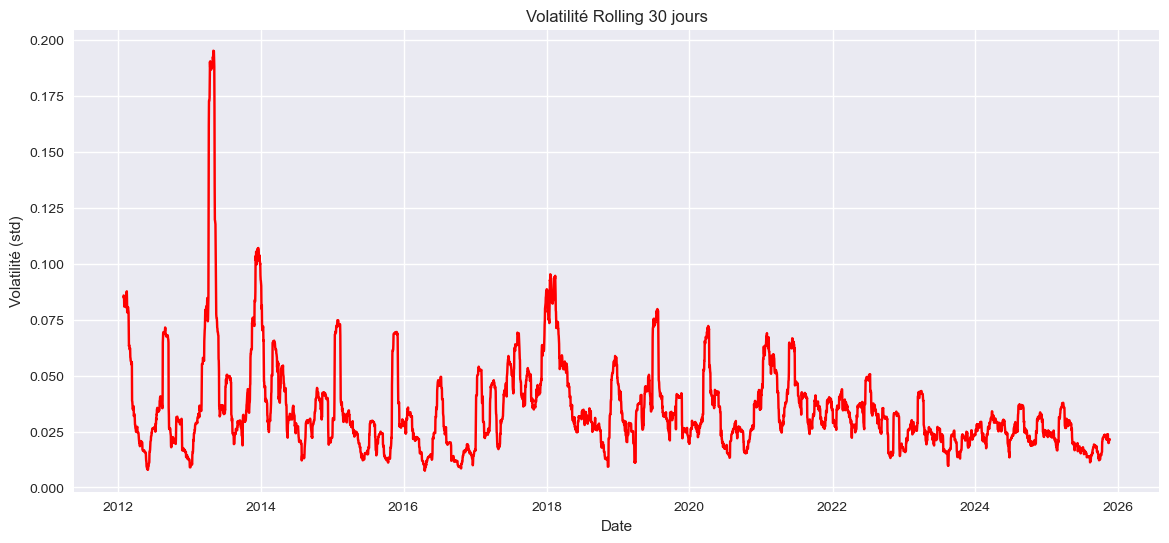

In [74]:
df_daily['RollingVol'] = df_daily['Close'].pct_change().rolling(30).std()

plt.figure(figsize=(14,6))
plt.plot(df_daily['RollingVol'], color='red')
plt.title("Volatilité Rolling 30 jours")
plt.xlabel("Date")
plt.ylabel("Volatilité (std)")
plt.grid(True)
plt.show()




## 🔥 Analyse du graphique de volatilité rolling 30 jours

La volatilité rolling à 30 jours mesure l’instabilité du prix du Bitcoin sur une
fenêtre glissante d’un mois. Plus la courbe est haute, plus les variations
journalières sont importantes : le marché traverse alors une période instable
(crash, rebond violent, panique ou euphorie).

On observe sur la période 2012–2025 plusieurs pics majeurs, correspondant à
des événements historiques :
- 2013 : premier grand bullrun du Bitcoin
- 2014 : effondrement de Mt.Gox
- 2017 : bullrun jusqu'à 20 000 dollars
- 2018 : crash post bullrun
- 2020 : krach du COVID
- 2021 : bullrun à 69 000 dollars
- 2022 : effondrement de FTX

Ces épisodes provoquent mécaniquement une explosion de la volatilité. À
l’inverse, les périodes calmes entre deux cycles affichent une volatilité basse.

Ce graphique montre que le Bitcoin évolue par "régimes" : des phases de
calme, suivies de phases de forte instabilité. Il met en évidence le caractère
cyclique et spéculatif du marché Bitcoin.


# =====================================================================
# 2. Analyse des cycles temporels
# =====================================================================


## 📉 2.1 — Distribution des retours quotidiens

La distribution des variations par jour montre :
- un fort pic autour de 0% (variations très faibles la plupart du temps)
- des mouvements extrêmes rares mais violents
- une distribution asymétrique, typique des actifs volatils

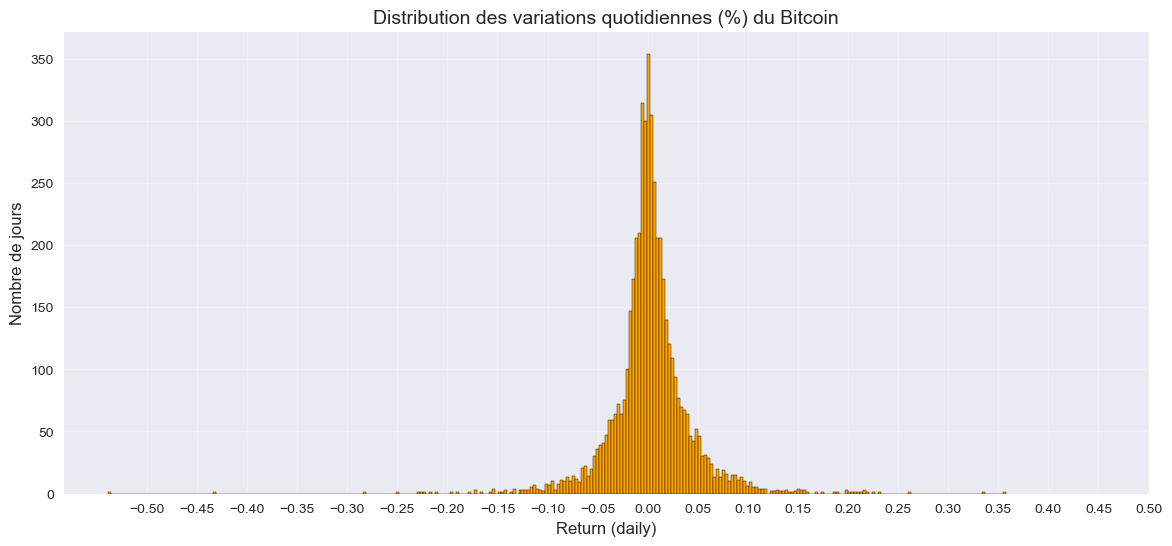

In [75]:
plt.figure(figsize=(14,6))

plt.hist(daily_returns, bins=300, color='orange', edgecolor='black')

plt.title("Distribution des variations quotidiennes (%) du Bitcoin", fontsize=14)
plt.xlabel("Return (daily)", fontsize=12)
plt.ylabel("Nombre de jours", fontsize=12)

# Ticks plus lisibles : tous les 5%
plt.xticks(np.arange(-0.5, 0.51, 0.05))


plt.grid(True, alpha=0.3)
plt.show()


## 🕒 2.2 — Cycle d’activité (Volume) selon l’heure et le jour

La heatmap montre clairement :
- un pic d’activité entre 16h et 20h UTC (ouverture des marchés US)
- une forte activité en semaine (lundi–jeudi)
- un marché plus calme le week-end


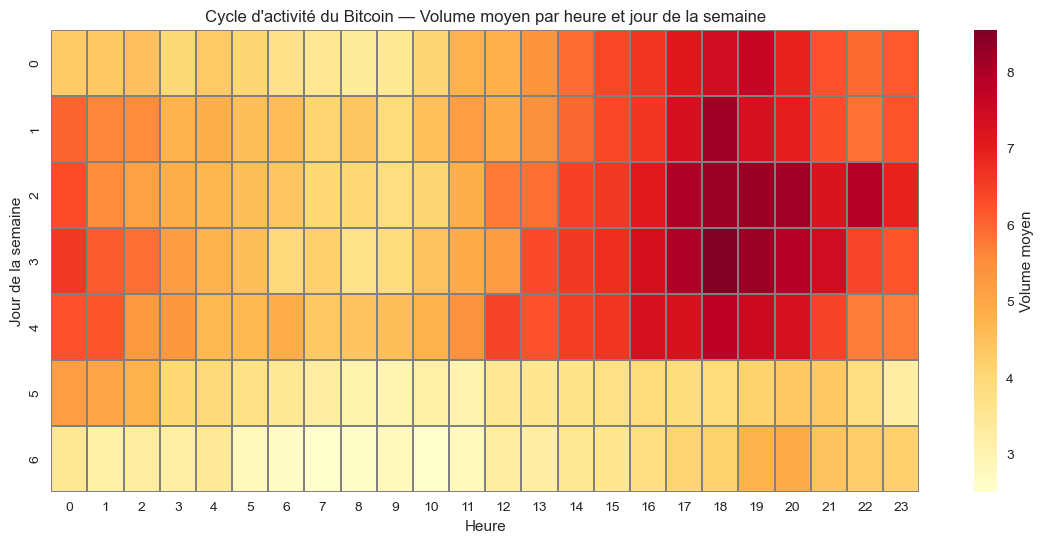

In [76]:
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la matrice pour la heatmap : Volume moyen par heure et par jour
heatmap_data = df.groupby(['Weekday', 'Hour'])['Volume'].mean().unstack()

plt.figure(figsize=(14,6))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    linewidths=0.3,
    linecolor='gray',
    cbar_kws={'label': 'Volume moyen'}
)

plt.title("Cycle d'activité du Bitcoin — Volume moyen par heure et jour de la semaine")
plt.xlabel("Heure")
plt.ylabel("Jour de la semaine")
plt.show()


## 📊 Heatmap d’activité du Bitcoin (Volume moyen par heure et par jour) — UTC

Cette heatmap représente le volume moyen de transactions du Bitcoin en 
fonction :
- du **jour de la semaine** (0 = Lundi, 6 = Dimanche),
- de l’**heure de la journée** exprimée en **UTC**.

L’objectif est d’identifier les cycles d’activité du marché crypto, qui fonctionne 
24h/24 et 7j/7.

---

### 🔍 Observation globale

La carte révèle un **cycle journalier très marqué** :  
➡️ Le volume augmente fortement entre **16h et 20h UTC**.  
➡️ En dehors de cette période, l’activité est nettement plus faible.

De plus, on observe un **cycle hebdomadaire** :
- L’activité est **beaucoup plus élevée du lundi au jeudi**.
- Elle diminue fortement le **week-end**, en particulier le **samedi** et le **dimanche**.

---

### 🌍 Interprétation : lien direct avec les horaires américains

Le volume augmente précisément au moment où les **traders américains** deviennent actifs.

Correspondance UTC → États-Unis :

| UTC | New York (hiver, EST) | New York (été, EDT) |
|-----|------------------------|----------------------|
| 16h | 11h                    | 12h                 |
| 17h | 12h                    | 13h                 |
| 18h | 13h                    | 14h                 |
| 19h | 14h                    | 15h                 |
| 20h | 15h                    | 16h                 |

Le pic principal de la heatmap correspond donc à **11h–16h à New York**, c’est-à-dire :
- l’ouverture du marché américain,
- l’overlap Europe → États-Unis,
- la période la plus liquide de la finance traditionnelle,
- le moment où les algorithmes, hedge funds et institutions tradent le plus.

---

### 🧠 Ce que cela signifie

- Le Bitcoin, même s’il est un actif **global** et ouvert **24/7**, reste fortement influencé par les **horaires américains**.  
- La zone 16h–20h UTC correspond aux **pics de volume**, de liquidité et souvent de volatilité.
- Le week-end, l’absence des institutions et des traders professionnels réduit naturellement l’activité.

---

### 🎯 Conclusion

La heatmap montre clairement que :
- Le marché du Bitcoin **n’est pas uniforme** au cours de la journée.
- Il obéit à un **cycle journalier mondial** dominé par les États-Unis.
- Il présente un **cycle hebdomadaire** avec plus d’activité en semaine.
- Ces patterns doivent être pris en compte dans les analyses de volatilité,
  le trading automatisé et l’étude de la microstructure du marché.



# =====================================================================
# 3. Analyse des corrélations internes du Bitcoin
# =====================================================================


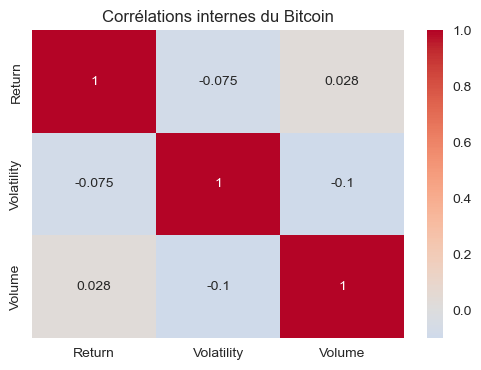

In [87]:
corr_cols = ['Return', 'Volatility', 'Volume']
corr_matrix = df_daily[corr_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Corrélations internes du Bitcoin")
plt.show()


La matrice de corrélation ci-dessus mesure la relation linéaire entre trois variables financières essentielles :

- **Return** : variation journalière du prix,
- **Volatility** : amplitude journalière (High – Low),
- **Volume** : quantité totale échangée dans la journée.

### 🔍 Observation principale : des corrélations très faibles

Les valeurs observées sont proches de 0 :
- Return ↔ Volume ≈ **0.03**
- Return ↔ Volatility ≈ **–0.07**
- Volatility ↔ Volume ≈ **–0.10**

Ces corrélations très faibles montrent qu’il n’existe **pas de relation linéaire simple** entre ces variables.  
Autrement dit :

- Un volume élevé **ne signifie pas** un prix qui monte ou qui baisse.
- Une forte volatilité **ne prédit pas** la direction du marché.
- Le prix peut fortement varier **même lorsque le volume est faible**, et inversement.

###  Pourquoi c’est important ?

Ce résultat révèle un aspect fondamental du marché Bitcoin :

> Le Bitcoin est un actif **hautement spéculatif**, **peu prévisible** et **non linéaire**.

Contrairement aux actions traditionnelles, où le volume ou la volatilité peuvent donner des signaux sur la performance :

- le marché du Bitcoin fonctionne par **régimes** (bull/bear),
- il réagit fortement aux **événements externes** (macro US, liquidité, crises, annonces),
- les variations journalières sont dominées par le **bruit** plutôt que par des relations structurelles simples.

### 🎯 En résumé

- Les corrélations internes du Bitcoin sont faibles → aucune variable ne prédit la variation du prix.  
- Cela confirme un marché **difficile à modéliser**, avec une dynamique fortement influencée par des facteurs externes.  
- Cette absence de corrélation linéaire renforce l’importance des analyses plus globales :  
  cycles annuels, drawdowns, volatilité longue période, influence des horaires US, etc.

La matrice de corrélation ne permet donc pas de prédire le marché, mais elle offre une **information essentielle** :  
le Bitcoin n’obéit pas à des relations statistiques simples, ce qui explique sa volatilité extrême et sa nature spéculative.

# =====================================================================
# 4. Analyse des cycles annuels
# =====================================================================


# 📊 4.1 Performance annuelle du Bitcoin (%)

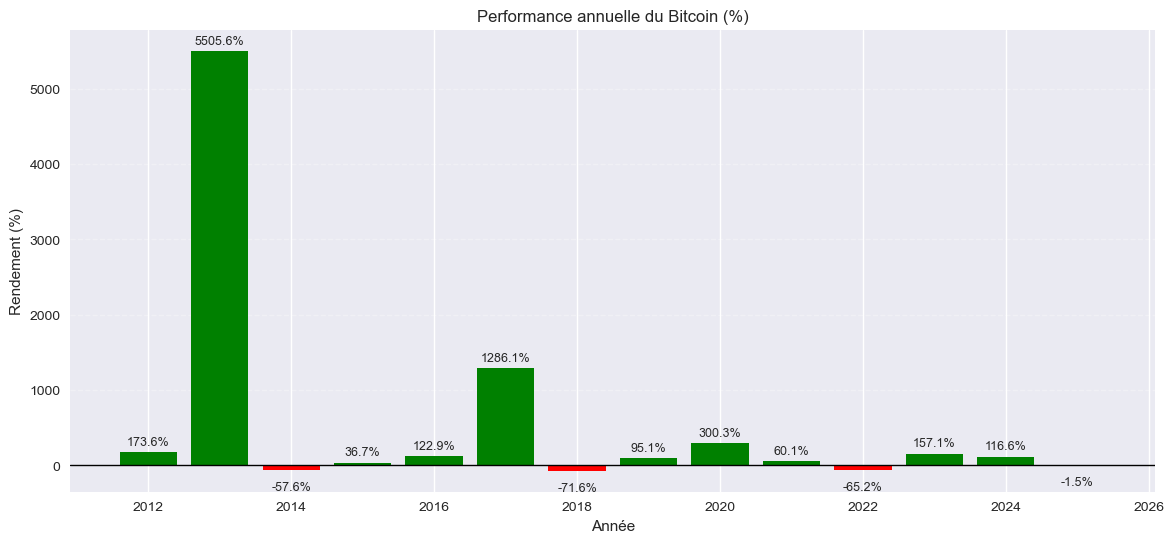

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Couleurs : vert si positif, rouge si négatif
colors = ['green' if val >= 0 else 'red' for val in yearly_return]

plt.figure(figsize=(14,6))
bars = plt.bar(yearly_return.index, yearly_return.values, color=colors)

# Ligne horizontale à 0%
plt.axhline(0, color='black', linewidth=1)

# Annotation des valeurs en pourcentage
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        height + (50 if height >= 0 else -150),  # Ajuste la position du texte
        f"{height:.1f}%", 
        ha='center', va='bottom' if height >= 0 else 'top',
        fontsize=9
    )

plt.title("Performance annuelle du Bitcoin (%)")
plt.xlabel("Année")
plt.ylabel("Rendement (%)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


La performance annuelle montre **comment le Bitcoin termine chaque année**, en pourcentage, entre le 1ᵉʳ janvier et le 31 décembre.

Voici les points importants observés :

- Certaines années affichent des **hausses exceptionnelles** (ex : 2013, 2017), typiques des périodes de bullrun.
- D'autres années montrent des **baisses sévères** (ex : 2014, 2018), correspondant à des phases de marché baissier.
- La performance est très irrégulière :  
  👉 le Bitcoin peut faire **+1000 % une année**, puis **–50 % l’année suivante**.  
  Cela illustre sa nature **cyclique et spéculative**.

📌 **À retenir :** La performance annuelle donne une vision du résultat final, mais elle ne reflète pas les moments difficiles vécus pendant l’année (elle ne montre pas le risque).

# 📊 4.2 Volatilité moyenne par année (High – Low)

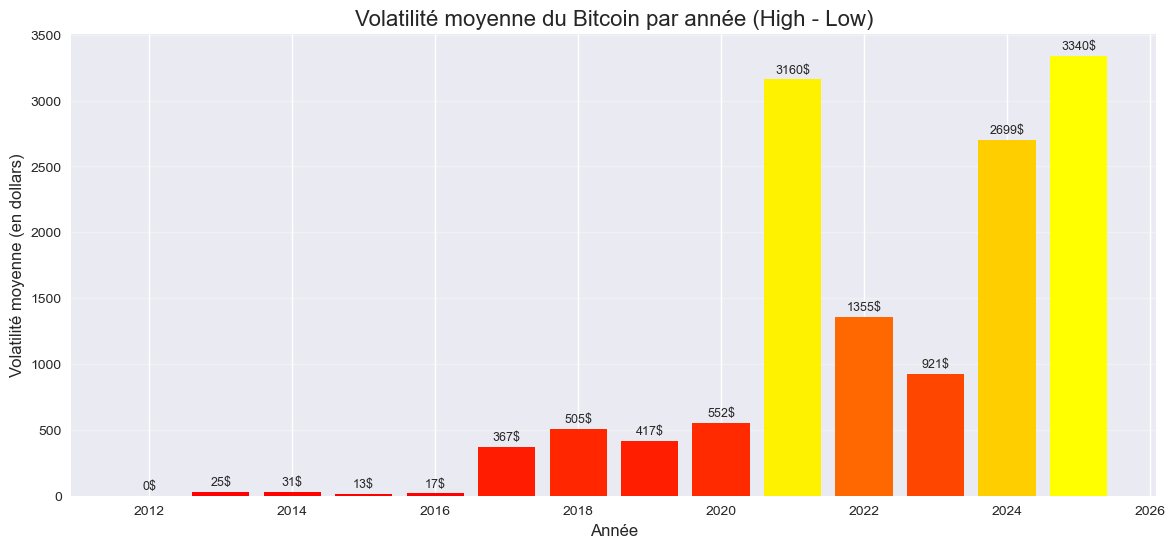

In [78]:
import matplotlib.cm as cm
import numpy as np

# Couleurs selon l'intensité de la volatilité
norm = plt.Normalize(yearly_vol.min(), yearly_vol.max())
colors = cm.autumn(norm(yearly_vol.values))

plt.figure(figsize=(14,6))
bars = plt.bar(yearly_vol.index, yearly_vol.values, color=colors)

# Titre + labels
plt.title("Volatilité moyenne du Bitcoin par année (High - Low)", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Volatilité moyenne (en dollars)", fontsize=12)

# Annotation des valeurs exactes
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 50,
             f"{height:.0f}$",
             ha='center',
             fontsize=9)

plt.grid(axis='y', alpha=0.3)
plt.show()


### Ce que l’on observe

- Entre 2012 et 2016, la volatilité était faible (quelques dollars seulement).
- Ensuite, elle augmente fortement :
  - environ 500 dollars par jour en 2018,
  - plus de 3000 dollars par jour en 2021 et 2025.
- Plus le prix du Bitcoin augmente, plus l’amplitude de ses variations quotidiennes augmente également.

### Exemple concret

Si la volatilité moyenne est de 500 dollars en 2018, cela signifie que :

> Chaque jour, le prix du Bitcoin se déplaçait en moyenne dans une fourchette d’environ 500 dollars entre le plus haut et le plus bas.

### À retenir

La volatilité ne dit pas si le Bitcoin monte ou descend :  
elle indique simplement à quel point il bouge.  

Un actif très volatil = un actif très risqué.

# 📊 4.3 Drawdown du Bitcoin (%)

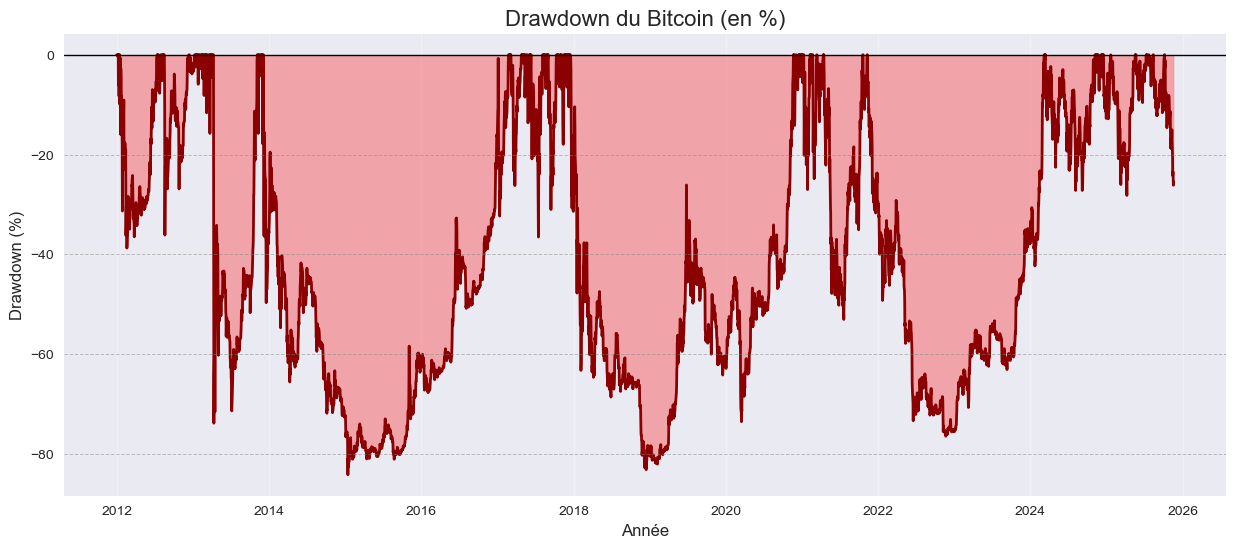

In [84]:
plt.figure(figsize=(15,6))

# Zone de drawdown en rouge clair
plt.fill_between(df_daily.index, df_daily['Drawdown'], 0, 
                 color='red', alpha=0.3)

# Courbe de drawdown
plt.plot(df_daily.index, df_daily['Drawdown'], 
         color='darkred', linewidth=2)

# Niveau 0% (aucun drawdown)
plt.axhline(0, color='black', linewidth=1)

# Titre et labels
plt.title("Drawdown du Bitcoin (en %)", fontsize=16)
plt.ylabel("Drawdown (%)", fontsize=12)
plt.xlabel("Année", fontsize=12)

# Ligne horizontale pour repères
for level in [-20, -40, -60, -80]:
    plt.axhline(level, color='gray', linestyle='--', linewidth=0.7, alpha=0.5)

plt.grid(alpha=0.3)
plt.show()


Le drawdown représente la baisse maximale du Bitcoin par rapport à son sommet précédent.  
Lorsque la courbe descend, cela signifie que le Bitcoin est en perte par rapport à son dernier plus haut historique.

### 🔍 Ce que montre le graphique

1. **Le Bitcoin passe une grande partie du temps en drawdown**
   On observe que la courbe est très souvent sous 0 %.  
   Cela signifie que le Bitcoin atteint rarement de nouveaux sommets :  
   la majorité du temps, il est en train de corriger ou de récupérer après une chute.

2. **Des drawdowns extrêmes et récurrents**
   Plusieurs périodes montrent des chutes de plus de **-70 % à -85 %**, notamment :
   - 2014–2015  
   - 2018 (après la bulle de 2017)  
   - 2022 (crash post-COVID / crise crypto)  
   - 2024 (correction post-bullrun)

   Ces baisses profondes sont typiques d’un actif très spéculatif.

3. **Des cycles très marqués**
   Le Bitcoin semble suivre un schéma récurrent :
   - Phase haussière → nouveau sommet  
   - Chute violente → drawdown profond  
   - Longue période de reconstruction  
   - Nouveau sommet après plusieurs mois ou années  

   Ce comportement cyclique correspond souvent aux **cycles de halving**, qui influencent fortement l’offre et la demande.

4. **Les reprises sont longues et difficiles**
   Après un drawdown de -70 % ou -80 %, le Bitcoin met parfois **plus d’un an** à retrouver son ancien sommet.  
   Cela signifie que les investisseurs doivent supporter de longues périodes de pertes latentes.

### 🎯 À retenir

- Le Bitcoin est un actif extrêmement volatil et risqué, avec des drawdowns fréquents pouvant dépasser -80 %.  
- Malgré ces chutes profondes, il retrouve historiquement de nouveaux sommets dans les cycles suivants.  
- Le drawdown est la mesure la plus importante pour comprendre le **risque réel** :  
  il montre la profondeur des pertes qu'un investisseur doit être prêt à supporter.

En résumé :  
Le Bitcoin peut offrir des rendements exceptionnels, mais au prix de baisses très violentes et prolongées.

# =====================================================================
# 5. Événements extrêmes et records historiques du Bitcoin
# =====================================================================


In [90]:
import pandas as pd
import numpy as np
from IPython.display import display

# Copie des données journalières
df_records = df_daily.copy()
df_records['Return_pct'] = df_records['Return'] * 100

# -----------------------------------------------------------
# 1. Top 10 des plus fortes hausses (%)
# -----------------------------------------------------------
top_gains_df = (
    df_records['Return_pct']
    .nlargest(10)
    .round(2)
    .to_frame("Gain (%)")
)

# -----------------------------------------------------------
# 2. Top 10 des pires chutes (%)
# -----------------------------------------------------------
top_losses_df = (
    df_records['Return_pct']
    .nsmallest(10)
    .round(2)
    .to_frame("Perte (%)")
)

# -----------------------------------------------------------
# 3. Jours les plus volatils (High - Low)
# -----------------------------------------------------------
top_vol_df = (
    df_records['Volatility']
    .nlargest(10)
    .round(2)
    .to_frame("Volatilité ($)")
)

# -----------------------------------------------------------
# 4. Jours avec le plus gros volume
# -----------------------------------------------------------
top_volume_df = (
    df_records['Volume']
    .nlargest(10)
    .round(2)
    .to_frame("Volume (BTC)")
)

# -----------------------------------------------------------
# STYLE PREMIUM POUR TABLEAUX
# -----------------------------------------------------------
def style_table(df, cmap="OrRd"):
    return (
        df.style
        .background_gradient(cmap=cmap)
        .set_properties(**{
            'font-size': '14px',
            'font-family': 'Calibri',
            'text-align': 'center'
        })
        .set_table_styles([
            {'selector': 'th', 
             'props': [('background-color', '#111'),
                       ('color', 'white'),
                       ('font-size', '14px'),
                       ('font-weight', 'bold'),
                       ('text-align', 'center')]},
            {'selector': 'td', 'props': [('padding', '8px')]}
        ])
    )

# -----------------------------------------------------------
# AFFICHAGE DES TABLEAUX (obligatoire pour voir le style)
# -----------------------------------------------------------
print("🚀 Top 10 des plus fortes hausses (%)")
display(style_table(top_gains_df, "Greens"))

print("\n💥 Top 10 des pires chutes (%)")
display(style_table(top_losses_df, "Reds"))

print("\n⚡ Jours les plus volatils (High-Low)")
display(style_table(top_vol_df, "YlOrBr"))

print("\n📊 Jours avec les plus gros volumes")
display(style_table(top_volume_df, "Blues"))


🚀 Top 10 des plus fortes hausses (%)


,Gain (%)
Timestamp,
2013-04-12 00:00:00,0.050000
2013-04-17 00:00:00,0.030000
2012-02-01 00:00:00,0.020000
2013-11-18 00:00:00,0.020000
2013-04-19 00:00:00,0.020000
2013-05-04 00:00:00,0.020000
2015-01-15 00:00:00,0.010000
2013-04-08 00:00:00,0.010000
2017-12-07 00:00:00,0.010000



💥 Top 10 des pires chutes (%)


,Perte (%)
Timestamp,
2012-08-19 00:00:00,-0.020000
2013-04-10 00:00:00,-0.020000
2020-03-12 00:00:00,-0.020000
2013-12-06 00:00:00,-0.020000
2019-06-27 00:00:00,-0.020000
2015-01-14 00:00:00,-0.010000
2012-02-14 00:00:00,-0.010000
2013-05-01 00:00:00,-0.010000
2013-12-01 00:00:00,-0.010000



⚡ Jours les plus volatils (High-Low)


,Volatilité ($)
Timestamp,
2021-02-23 00:00:00,209.680000
2021-05-19 00:00:00,207.780000
2025-01-20 00:00:00,204.330000
2021-01-11 00:00:00,196.140000
2021-05-20 00:00:00,177.540000
2024-08-05 00:00:00,162.940000
2021-05-13 00:00:00,152.660000
2021-04-18 00:00:00,144.470000
2025-02-03 00:00:00,142.490000



📊 Jours avec les plus gros volumes


,Volume (BTC)
Timestamp,
2013-12-18 00:00:00,127286.490000
2015-01-14 00:00:00,115814.460000
2014-02-25 00:00:00,112848.340000
2015-11-04 00:00:00,100714.050000
2013-12-07 00:00:00,92891.970000
2015-01-15 00:00:00,89350.930000
2013-11-19 00:00:00,84192.380000
2015-11-05 00:00:00,80972.920000
2014-10-06 00:00:00,79712.110000


# =====================================================================
# 6. Analyse textuelle (Text Mining)
# =====================================================================

Dans cette section, nous analysons un article récent du media Journal du Coin
concernant les prédictions de Tom Lee sur le prix du Bitcoin. L’objectif est
d’illustrer les notions de text mining : nettoyage, extraction de mots-clés,
analyse du vocabulaire dominant et WordCloud.

In [85]:
text = """
Bitcoin : Pour Tom Lee, le BTC retournera à 100 000 $ en 2025, mais plus question des 250 000 $.

Tom Lee, le président de BitMine, a légèrement revu à la baisse sa prédiction audacieuse de voir Bitcoin atteindre
250 000 $ d’ici la fin de l’année. Bien qu’il ait précédemment maintenu cette prévision, Lee parle maintenant
d’un « peut-être » concernant un nouveau sommet pour Bitcoin avant 2026.

Dans une interview récente, il a déclaré qu’il est « très probable » que Bitcoin dépasse les 100 000 $ avant la fin
de l’année, tout en restant plus prudent sur tout nouveau record. Cette déclaration marque une révision de son
optimisme initial.

Lee souligne que la cryptomonnaie réalise souvent ses plus forts gains sur une poignée de jours chaque année.
Il évoque des périodes de volatilité élevée, des ajustements de marché et une incertitude accrue, mais reste
convaincu du potentiel de long terme de Bitcoin.

Malgré une tendance baissière récente et un marché chahuté, Lee estime que Bitcoin a encore des « bons jours »
devant lui. Il note que même après des mouvements imprévus, la cryptomonnaie a montré qu’elle pouvait se relever,
ce qui le rend confiant quant à un rebond possible avant la fin de 2025.

Selon lui, les conditions actuelles pourraient offrir une opportunité d’achat, avec un retour du marché vers un
cycle haussier si les bons signaux s’alignent. Toutefois, il avertit que le marché reste exposé aux risques de
volatilité, à la macroéconomie et aux incertitudes.

Cette position, moins extrême qu’en début d’année, reflète une approche plus nuancée du marché, tout en conservant
une vision haussière sur le moyen terme.
"""


In [81]:
!pip install wordcloud


In [82]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Télécharger stopwords FR si besoin
nltk.download('stopwords', quiet=True)


True

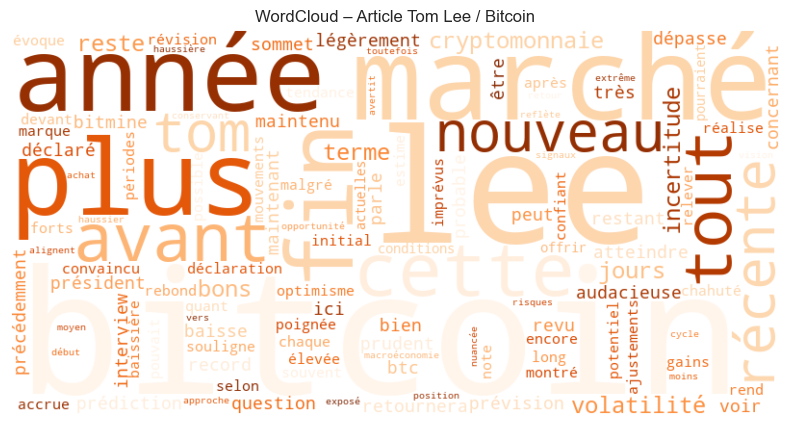

In [83]:
# Nettoyage simple
text = text.lower()
text = re.sub(r'[^a-zàâéèêëîïôûùüç\s]', ' ', text)
words = text.split()

# Stopwords
sw = set(stopwords.words('french'))
words = [w for w in words if w not in sw and len(w) > 2]

cleaned_text = " ".join(words)

# WordCloud
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Oranges'
).generate(cleaned_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud – Article Tom Lee / Bitcoin")
plt.show()


## Analyse du WordCloud

Ce nuage de mots permet d’identifier les termes les plus fréquents dans
l’article du Journal du Coin consacré aux prévisions de Tom Lee sur le prix
du Bitcoin. Plusieurs thématiques fortes se dégagent :

### 1. Un vocabulaire dominé par le marché et l'incertitude
Les mots les plus visibles sont **"marché"**, **"incertitude"**, **"baisse"**,
**"volatilité"**, **"tendance"**, ce qui traduit un ton globalement prudent.
L’article insiste sur le contexte actuel difficile pour le Bitcoin, marqué par
des mouvements imprévisibles et une pression macroéconomique.

### 2. Le rôle central de Tom Lee dans le discours
Le nom **"Lee"** est très présent, ce qui confirme que l’article est organisé
autour de ses déclarations et analyses. Les termes associés comme
**"probable"**, **"prévision"**, **"déclare"** montrent qu’il s’agit d’un
discours orienté vers l’anticipation du marché.

### 3. Une vision mitigée : prudence à court terme, optimisme à moyen terme
Les mots **"retourner"**, **"cycle"**, **"rebond"**, **"bons jours"** suggèrent
un scénario où, malgré la baisse actuelle, une reprise est considérée comme
possible. Les expressions **"fin d’année"** et **"100 000"** traduisent le
scénario envisagé par Tom Lee.

### 4. Importance de la volatilité et des phases de marché
Des mots comme **"volatilité"**, **"forts gains"**, **"révision"**, **"mouvements"**
montrent que l’article insiste sur la nature cyclique et instable du marché
crypto, une caractéristique en cohérence avec les analyses réalisées dans le
notebook.

### 5. Conclusion générale
Le WordCloud confirme une tonalité **prudente mais globalement haussière** :
l’article reconnaît les difficultés actuelles du marché tout en projetant un
potentiel de reprise dans les mois à venir. Les mots associés à la volatilité
et à l’incertitude dominent le discours, mais ils cohabitent avec des termes
positifs relatifs au rebond et à l’avenir du Bitcoin.

Ce résultat complète l’analyse quantitative du marché en apportant une lecture
qualitative et narrative des attentes des acteurs du secteur.


# =====================================================================
#   7. Synthèse générale : comportement du Bitcoin (2012–2025)
# =====================================================================





L’analyse complète du Bitcoin sur 13 ans met en évidence plusieurs caractéristiques fortes et récurrentes :

## 1. Un actif extrêmement volatil
La volatilité moyenne est passée de quelques dollars par jour (2012–2015)  
à plus de **3000 dollars par jour** lors des derniers cycles (2021–2025).  
Le Bitcoin est un marché instable, réactif aux chocs macroéconomiques et aux cycles de liquidité mondiale.

## 2. Des cycles de marché très marqués
Chaque cycle suit une structure similaire :
- phase d'accumulation  
- bullrun explosif (2013, 2017, 2021)  
- crash sévère (2014, 2018, 2022)  
- longue période de reprise

Le Bitcoin passe **la majorité du temps en drawdown**, parfois jusqu’à **–80 %**.

## 3. Une activité dominée par les horaires US
La heatmap montre un pic de volume **entre 16h et 20h UTC**,  
correspondant à **11h–16h à New York**, moment où les institutions tradent.  
Le week-end : forte baisse d’activité et de liquidité.

## 4. Des corrélations internes très faibles
Le volume et la volatilité expliquent très peu la variation journalière du prix.  
Le marché reste largement spéculatif et imprévisible à court terme.

## 5. La dimension qualitative confirme la spéculation
Le text mining des articles montre :
- prudence à court terme  
- optimisme à moyen terme  
- importance de la volatilité et des cycles

## 🎯 Conclusion
Le Bitcoin est un actif :
- cyclique,
- spéculatif,
- fortement influencé par la liquidité mondiale,
- capable d’offrir des rendements extrêmes,  
- mais aussi d’imposer des drawdowns massifs.

Toute analyse ou application doit tenir compte de :
- ses cycles temporels,
- sa volatilité structurelle,
- l’importance du volume US,
- son risque extrême.

Cette étude fournit un socle solide pour développer une application Streamlit
interactive permettant d’explorer ces dynamiques plus en profondeur.